# Cleveland Heart Disease

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
dirpath = r'C:\Users\joeba\OneDrive\Documents\ML\cleveland heart disease'

In [3]:
df = pd.read_csv(dirpath+'/book1.csv')
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [12]:
df['num'].value_counts()

1    150
2    120
Name: num, dtype: int64

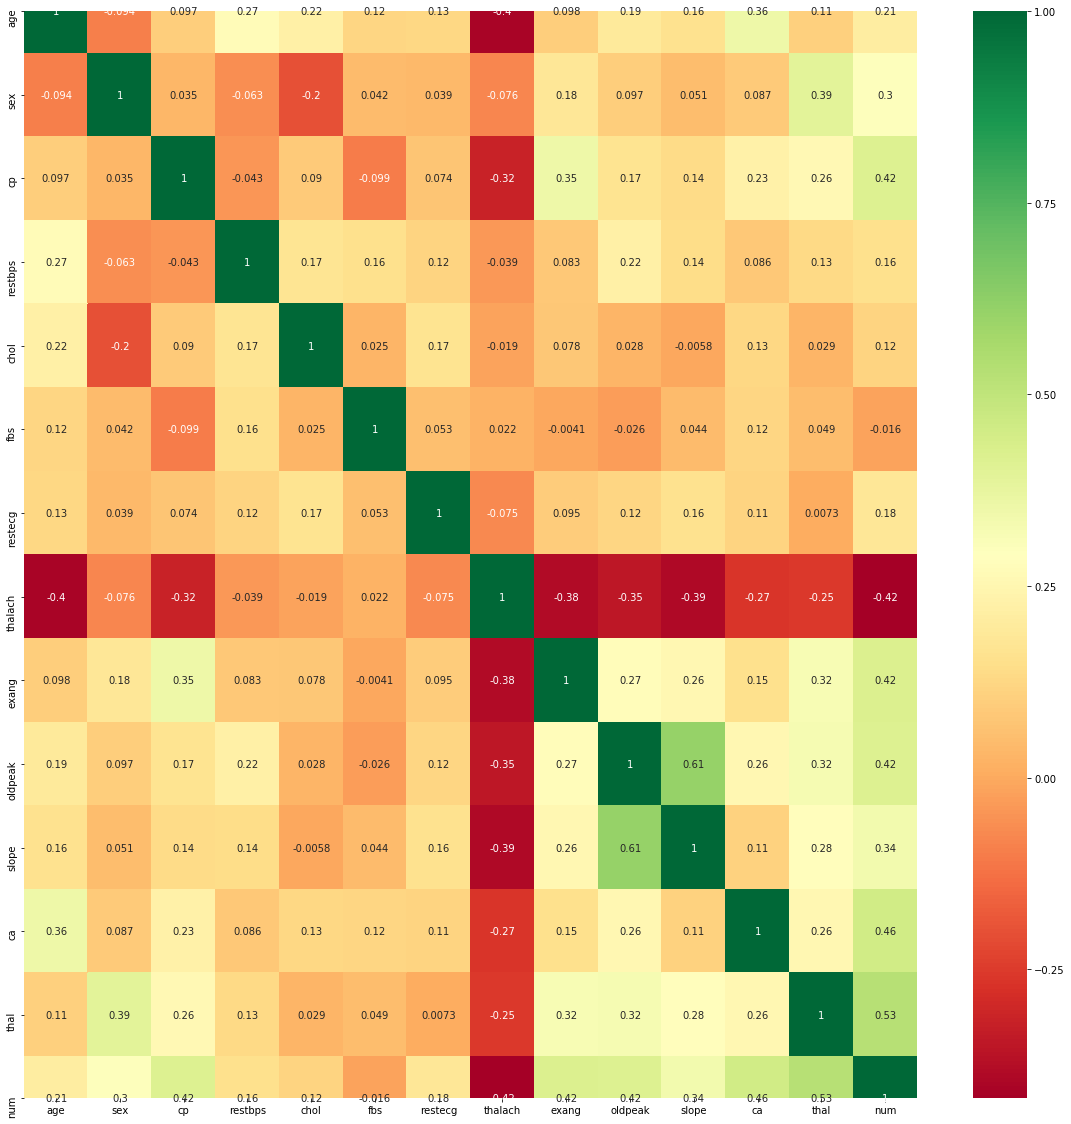

In [6]:
cm = df.corr()
tcf = cm.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[tcf].corr(), annot=True, cmap='RdYlGn')

In [7]:
X = df.iloc[:,0:12]
y = df.iloc[:,13]

In [11]:
# hyperparameter optimisation
params = {
    'learning_rate' : [ 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 ],
    'max_depth' : [ 3, 4, 5, 6, 8, 10, 12 ],
    'min_child_weight' : [ 1, 3, 5, 7 ],
    'gamma' : [ 0.0, 0.1, 0.2, 0.3, 0.4 ],
    'colsample_bytree' : [ 0.3, 0.4, 0.5, 0.7 ]
}

In [18]:
clf = xgb.XGBClassifier()
random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=5, scoring='roc_auc', cv=5, verbose=3)

In [19]:
random_search.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3, score=0.799, total=   0.2s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3, score=0.885, total=   0.1s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3, score=0.938, total=   0.1s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3, score=0.850, total=   0.1s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3, score=0.928, total=   0.0s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7, score=0.844, total=   0.0s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7, score=0.843, total=   0.0s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7, score=0.919, total=   0.0s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7, score=0.847, total=   0.0s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7, score=0.922, total=   0.0s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.1, gam

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'colsample_bytree': 

In [20]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.4}